In [1]:
import numpy as np
from numpy import dtype
import netCDF4 as nc
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn
import scipy as scipy
from scipy import stats,signal
from datetime import date
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cftime
import pingouin as pg
import csv
import os
import glob
import dask

In [2]:
# Define the parameters
yr1 = 1958; yr2 = 1980
tor1 = 1; tor2 = 5
nyr = yr2-yr1+1
dt01='-03-01';dt02='-05-29'
ndy=(date(1922,2,28)-date(1921,12,1)).days+1

In [135]:
# Import the data
# use glob to get all the csv files 
# in the folder
file_extension = '.csv'
os.chdir('/data/keeling/a/mgraber2/Data/SPCTOR_obs/Moore_SE')


In [136]:
all_filenames = [i for i in glob.glob(f"*{file_extension}")]
print(all_filenames)

['60-69_torn_SE.csv', '70-79_torn_SE.csv', '80-89_torn_SE.csv', '90-99_torn_SE.csv', '2000-2009_torn_SE.csv', '2010-2022_torn_SE.csv']


In [137]:
df = pd.concat(map(pd.read_csv, ['60-69_torn_SE.csv', '70-79_torn_SE.csv', '80-89_torn_SE.csv', '90-99_torn_SE.csv', '2000-2009_torn_SE.csv', '2010-2022_torn_SE.csv']))

In [138]:
df = df[['date', 'mag']]
df

,date,mag
0,1/14/1960,1
1,1/29/1960,1
2,2/3/1960,2
3,2/4/1960,1
4,2/4/1960,1
...,...,...
3315,12/15/2022,2
3316,12/15/2022,1
3317,12/15/2022,1
3318,12/15/2022,1


In [139]:
df['Date'] = pd.to_datetime(df['date']).dt.date

In [140]:
df

,date,mag,Date
0,1/14/1960,1,1960-01-14
1,1/29/1960,1,1960-01-29
2,2/3/1960,2,1960-02-03
3,2/4/1960,1,1960-02-04
4,2/4/1960,1,1960-02-04
...,...,...,...
3315,12/15/2022,2,2022-12-15
3316,12/15/2022,1,2022-12-15
3317,12/15/2022,1,2022-12-15
3318,12/15/2022,1,2022-12-15


In [141]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year
df

,date,mag,Date,month,year
0,1/14/1960,1,1960-01-14,1,1960
1,1/29/1960,1,1960-01-29,1,1960
2,2/3/1960,2,1960-02-03,2,1960
3,2/4/1960,1,1960-02-04,2,1960
4,2/4/1960,1,1960-02-04,2,1960
...,...,...,...,...,...
3315,12/15/2022,2,2022-12-15,12,2022
3316,12/15/2022,1,2022-12-15,12,2022
3317,12/15/2022,1,2022-12-15,12,2022
3318,12/15/2022,1,2022-12-15,12,2022


In [142]:
df = df[(df.year <1980)]
df = df[(df.year >1959)]
df

,date,mag,Date,month,year
0,1/14/1960,1,1960-01-14,1,1960
1,1/29/1960,1,1960-01-29,1,1960
2,2/3/1960,2,1960-02-03,2,1960
3,2/4/1960,1,1960-02-04,2,1960
4,2/4/1960,1,1960-02-04,2,1960
...,...,...,...,...,...
2093,11/25/1979,3,1979-11-25,11,1979
2094,11/25/1979,2,1979-11-25,11,1979
2095,11/25/1979,1,1979-11-25,11,1979
2096,12/23/1979,1,1979-12-23,12,1979


In [143]:
dfwarm =df[(df.month > 3) & (df.month < 8)]
#dfOND = df[(df.month > 10)]
#dfJFM = df[(df.month < 3)]

In [144]:
values = list(dfwarm['Date'].value_counts())
#values=list(dfOND['Date'].value_counts())
#values2=list(dfJFM['Date'].value_counts())

In [145]:
onefive = []
sixten = []
three = []
four = []
five = []
six = []
seven = []
for x in values:
    if x > 0:
        onefive.append(x)
for x in values:
    if x > 5:
        sixten.append(x)
for x in values:
    if x > 10:
        three.append(x)
for x in values:
    if x > 15:
        four.append(x)
for x in values:
    if x > 20:
        five.append(x)
for x in values:
    if x > 25:
        six.append(x)
for x in values:
    if x > 30:
        seven.append(x)
'''for x in values2:
    if x > 0:
        onefive.append(x)
for x in values2:
    if x > 5:
        sixten.append(x)
for x in values2:
    if x > 10:
        three.append(x)
for x in values2:
    if x > 15:
        four.append(x)
for x in values2:
    if x > 20:
        five.append(x)
for x in values2:
    if x > 25:
        six.append(x)
for x in values2:
    if x > 30:
        seven.append(x)'''
print(len(onefive))
print(len(sixten))
print(len(three))
print(len(four))
print(len(five))
print(len(six))
print(len(seven))

656
63
17
6
2
2
2


Text(0.5, 1.0, '2000-2022')

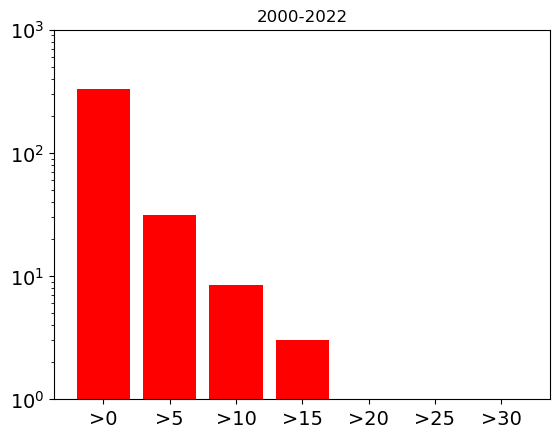

In [146]:
names = ['>0', '>5', '>10', '>15','>20','>25','>30']
numbers = [(656/20)*10,(63/20)*10,(17/20)*10,(6/20)*10,(2/20)*10,(2/20)*10,(2/20)*10]
ax1 = plt.bar(names, numbers, color='r')
plt.yscale('log')
#plt.xlabel("# of Tornadoes")
#plt.ylabel("# of Days")
plt.ylim(1,1000)
plt.xticks(fontsize='14')
plt.yticks(fontsize='14')
plt.title('2000-2022')

In [164]:
stats.ttest_ind(903,551, equal_var=True)
#stats.ttest_1samp(values, popmean=1)
#stats.ttest_ind(values, numbers, equal_var=True)

/tmp/ipykernel_23468/261232971.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats.ttest_ind(903,551, equal_var=True)


Ttest_indResult(statistic=nan, pvalue=nan)

In [38]:
#df = df[['YEAR','TOR_F_SCALE']]
df = df[['yr','date','mag']]
df

,yr,date,mag
0,1960,1/14/1960,2
1,1960,1/14/1960,1
2,1960,1/14/1960,2
3,1960,1/28/1960,1
4,1960,2/9/1960,1
...,...,...,...
1329,2022,12/13/2022,2
1330,2022,12/13/2022,1
1331,2022,12/13/2022,2
1332,2022,12/13/2022,2


In [39]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [40]:
dfwarm =df[(df.month > 3) & (df.month < 8)]
dfcold = df[(df.month > 10) & df.month < 3]

In [41]:
values=list(dfwarm['yr'].value_counts(sort=False))

In [42]:
Years=[1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

Text(0.5, 1.0, '# of (E)F-1+ Tornadoes per warm season (Great Plains)-SPC')

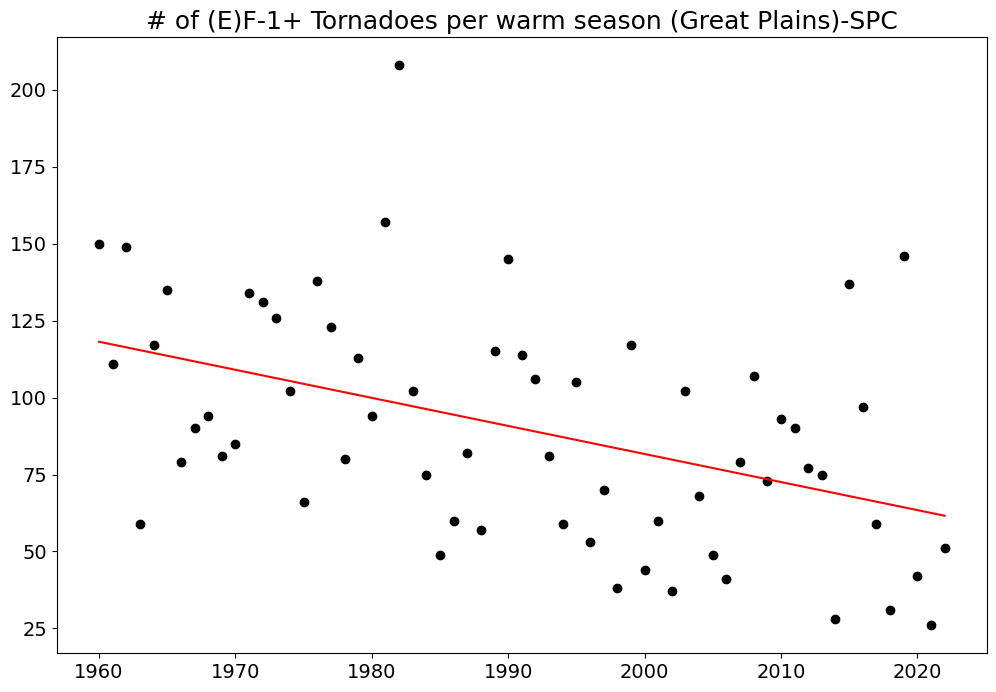

In [43]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1=plt.scatter(Years, values, color='k')
z = np.polyfit(Years, values, 1)
p = np.poly1d(z)
plt.plot(Years,p(Years), color='r')
plt.xticks(fontsize='14')
plt.yticks(fontsize='14')
#plt.xlabel('Years', fontsize='16')
#plt.ylabel('# of Tornadoes', fontsize='16')
plt.title('# of (E)F-1+ Tornadoes per warm season (Great Plains)-SPC', fontsize = '18')

In [44]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Years,values)
print(slope)
print(p_value)

-0.9118663594470052
0.0002670347300248802


In [165]:
plot_distribution(onefive)

NameError: name 'plot_distribution' is not defined